<h2>Lab work Waves Unit 
 (module CIEM3000)</h2>

<h1 style="color:#00BFFF;">Data analysis labwork prep</h1>
<hr style="height:2px;border:none;color:#333;" />

This notebook will help you start with your data analysis. The main objective is to obtain a data series from the daisy files you generated during the experiments, which you can then use to answer your research questions.

<h3 style="color:#00BFFF;">Loading in some basic packages for calculations and operations </h3>
<hr style="height:1.5px;border:none;color:#333;" />

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal #importing scipy.signal package for detrending
from scipy.fftpack import fft #importing Fourier transform package
from scipy.stats import chi2 #importing confidence interval package

plt.rcParams['figure.figsize'] = (15, 5)  # Set the width and height of plots in inches
plt.rcParams.update({'font.size': 13})  # Change this value to your desired font size

<h3 style="color:#00BFFF;">Data import </h3>
<hr style="height:1.5px;border:none;color:#333;" />

First import the data for both the EMF's and the wavegauges, using `np.loadtxt`, with `dtype = float`. The first rows of your ASC are headers that provide information of the data, the parameter `skiprows` avoid these. Note that the information of all sensors is stored in the array. Then store the time in an array and EMF and wavegauge data separately. Open the ASC file with a text editor to verify what each column represents.

In [ ]:
# fileName = 'run_test.ASC'
# data  = np.array(np.loadtxt(  'run_test.ASC', dtype = float, delimiter = ';', usecols=range(12), skiprows = 7))

# plt.plot(data[:, 0], data[:, 1])
# plt.xlabel('time (s)')
# plt.ylabel('???')
# plt.grid()

In [3]:
fdir = 'Flume'
filesep = '/'
numRun = [1,2,4,5,6,8,9,10,'regular']
res ={}

for i in numRun:
    if i != 'regular':
        fname = 'run' + str(i)
    else:
        fname = 'regular'

    fLoc = fdir + filesep + fname + '.ASC'

    data = np.genfromtxt(fLoc,delimiter=';',skip_header=7,dtype=float)

    t = data[:,0]
    wl = data[:,1::2]
    v= data[:,2:-1:2]

    res[fname] = {
            'time' : t,
            'wl' : wl,
            'vel' : v,
        }


In [9]:
for d in res.keys():
    print(d)

run1
run2
run4
run5
run6
run8
run9
run10
regular


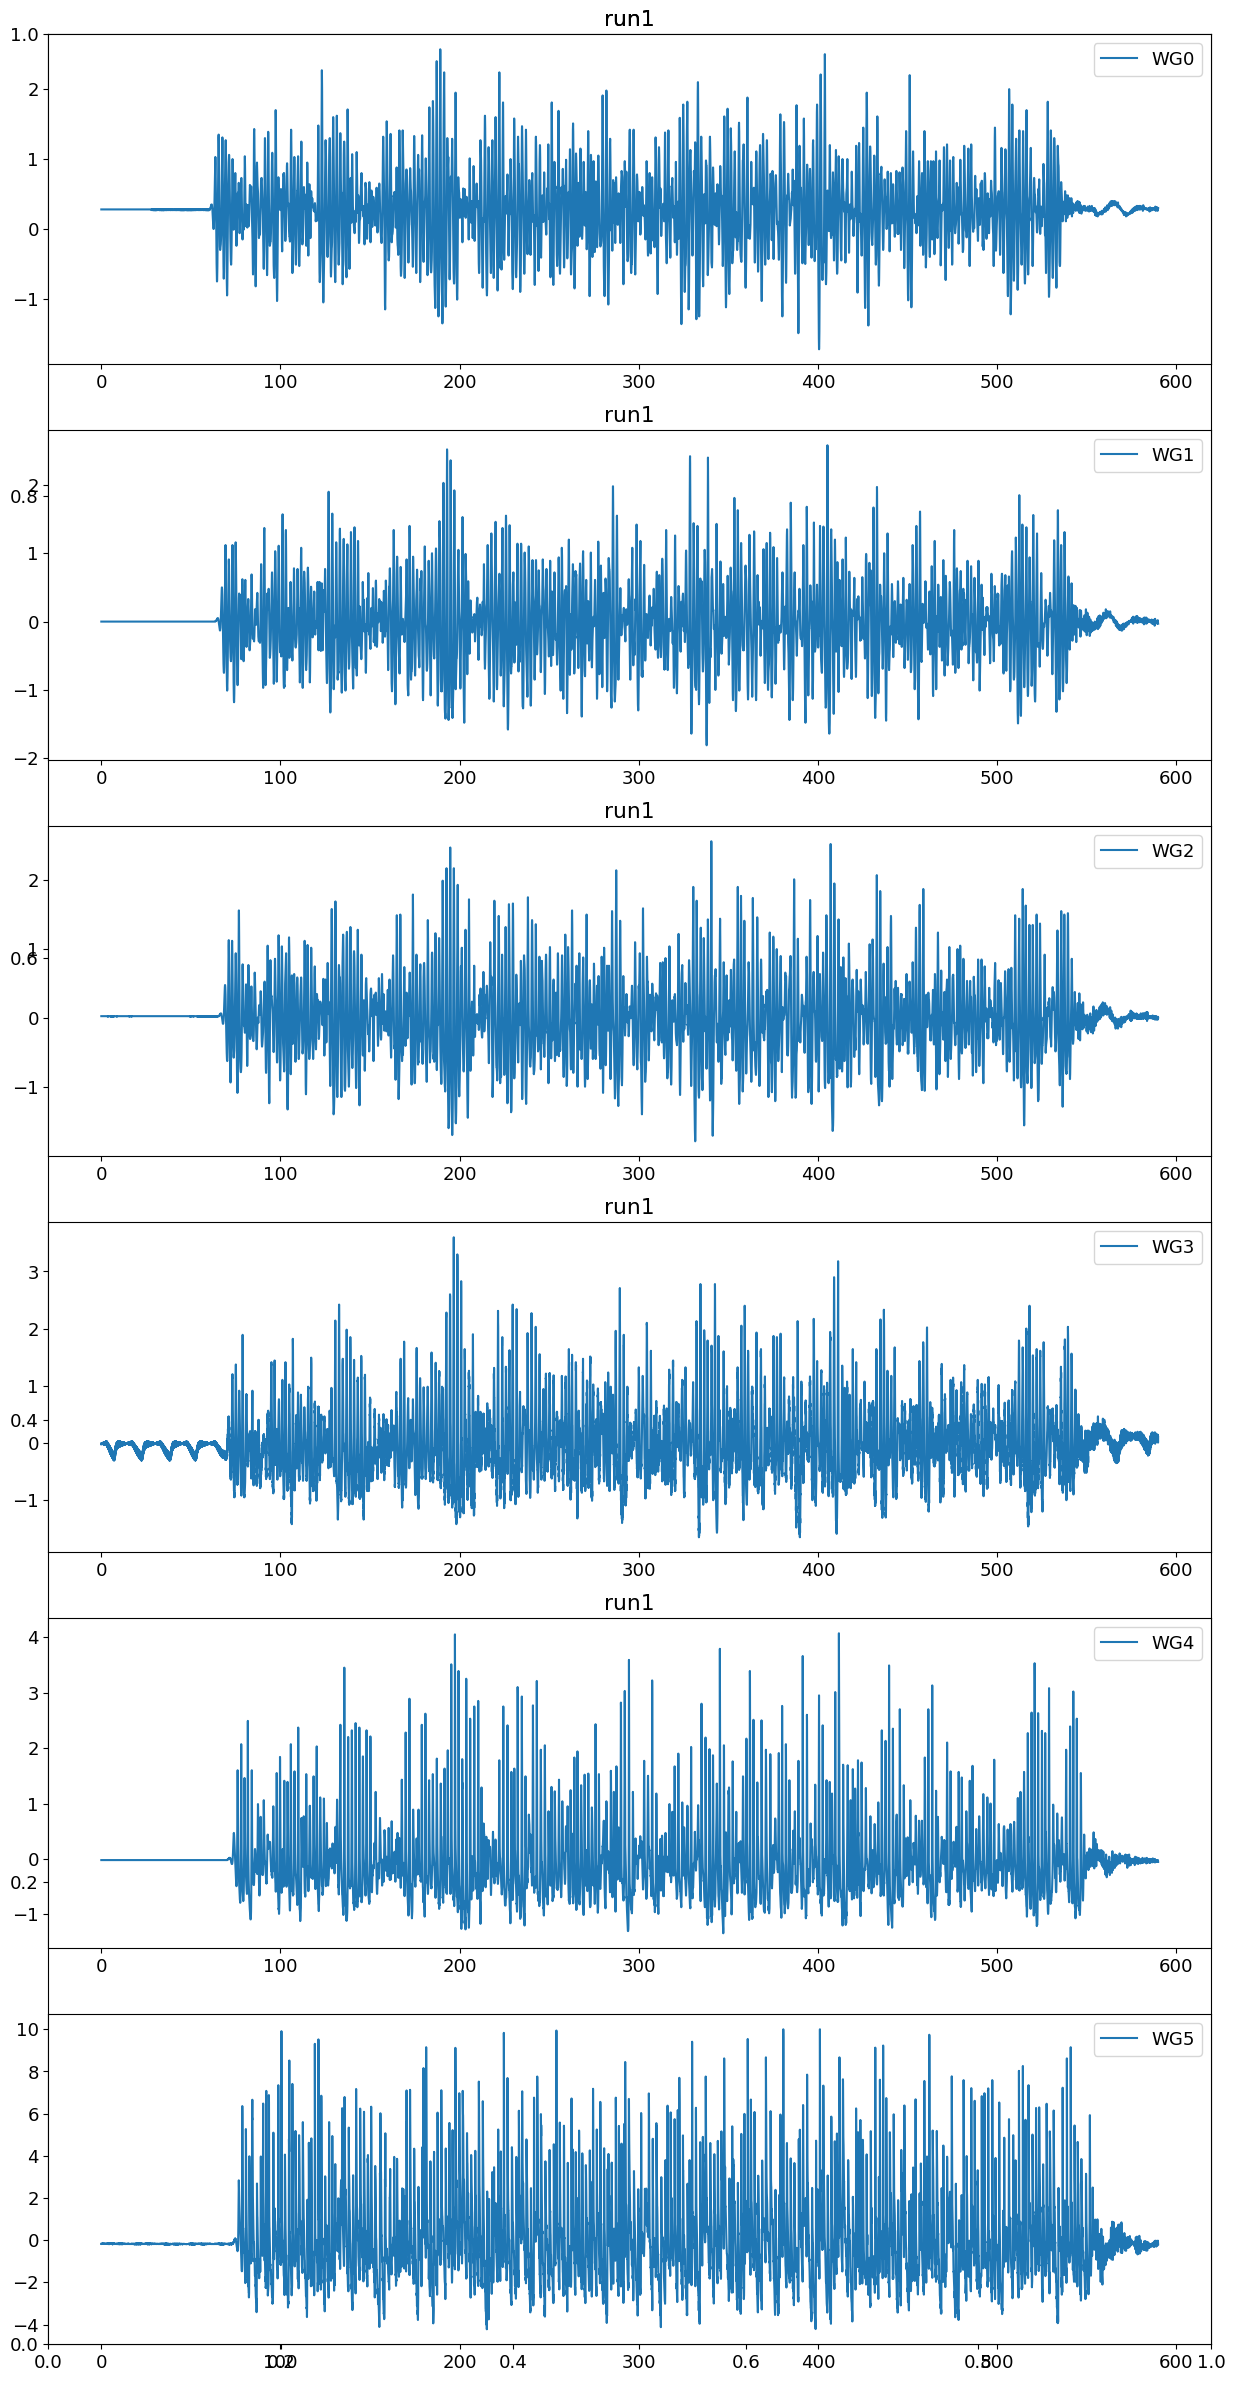

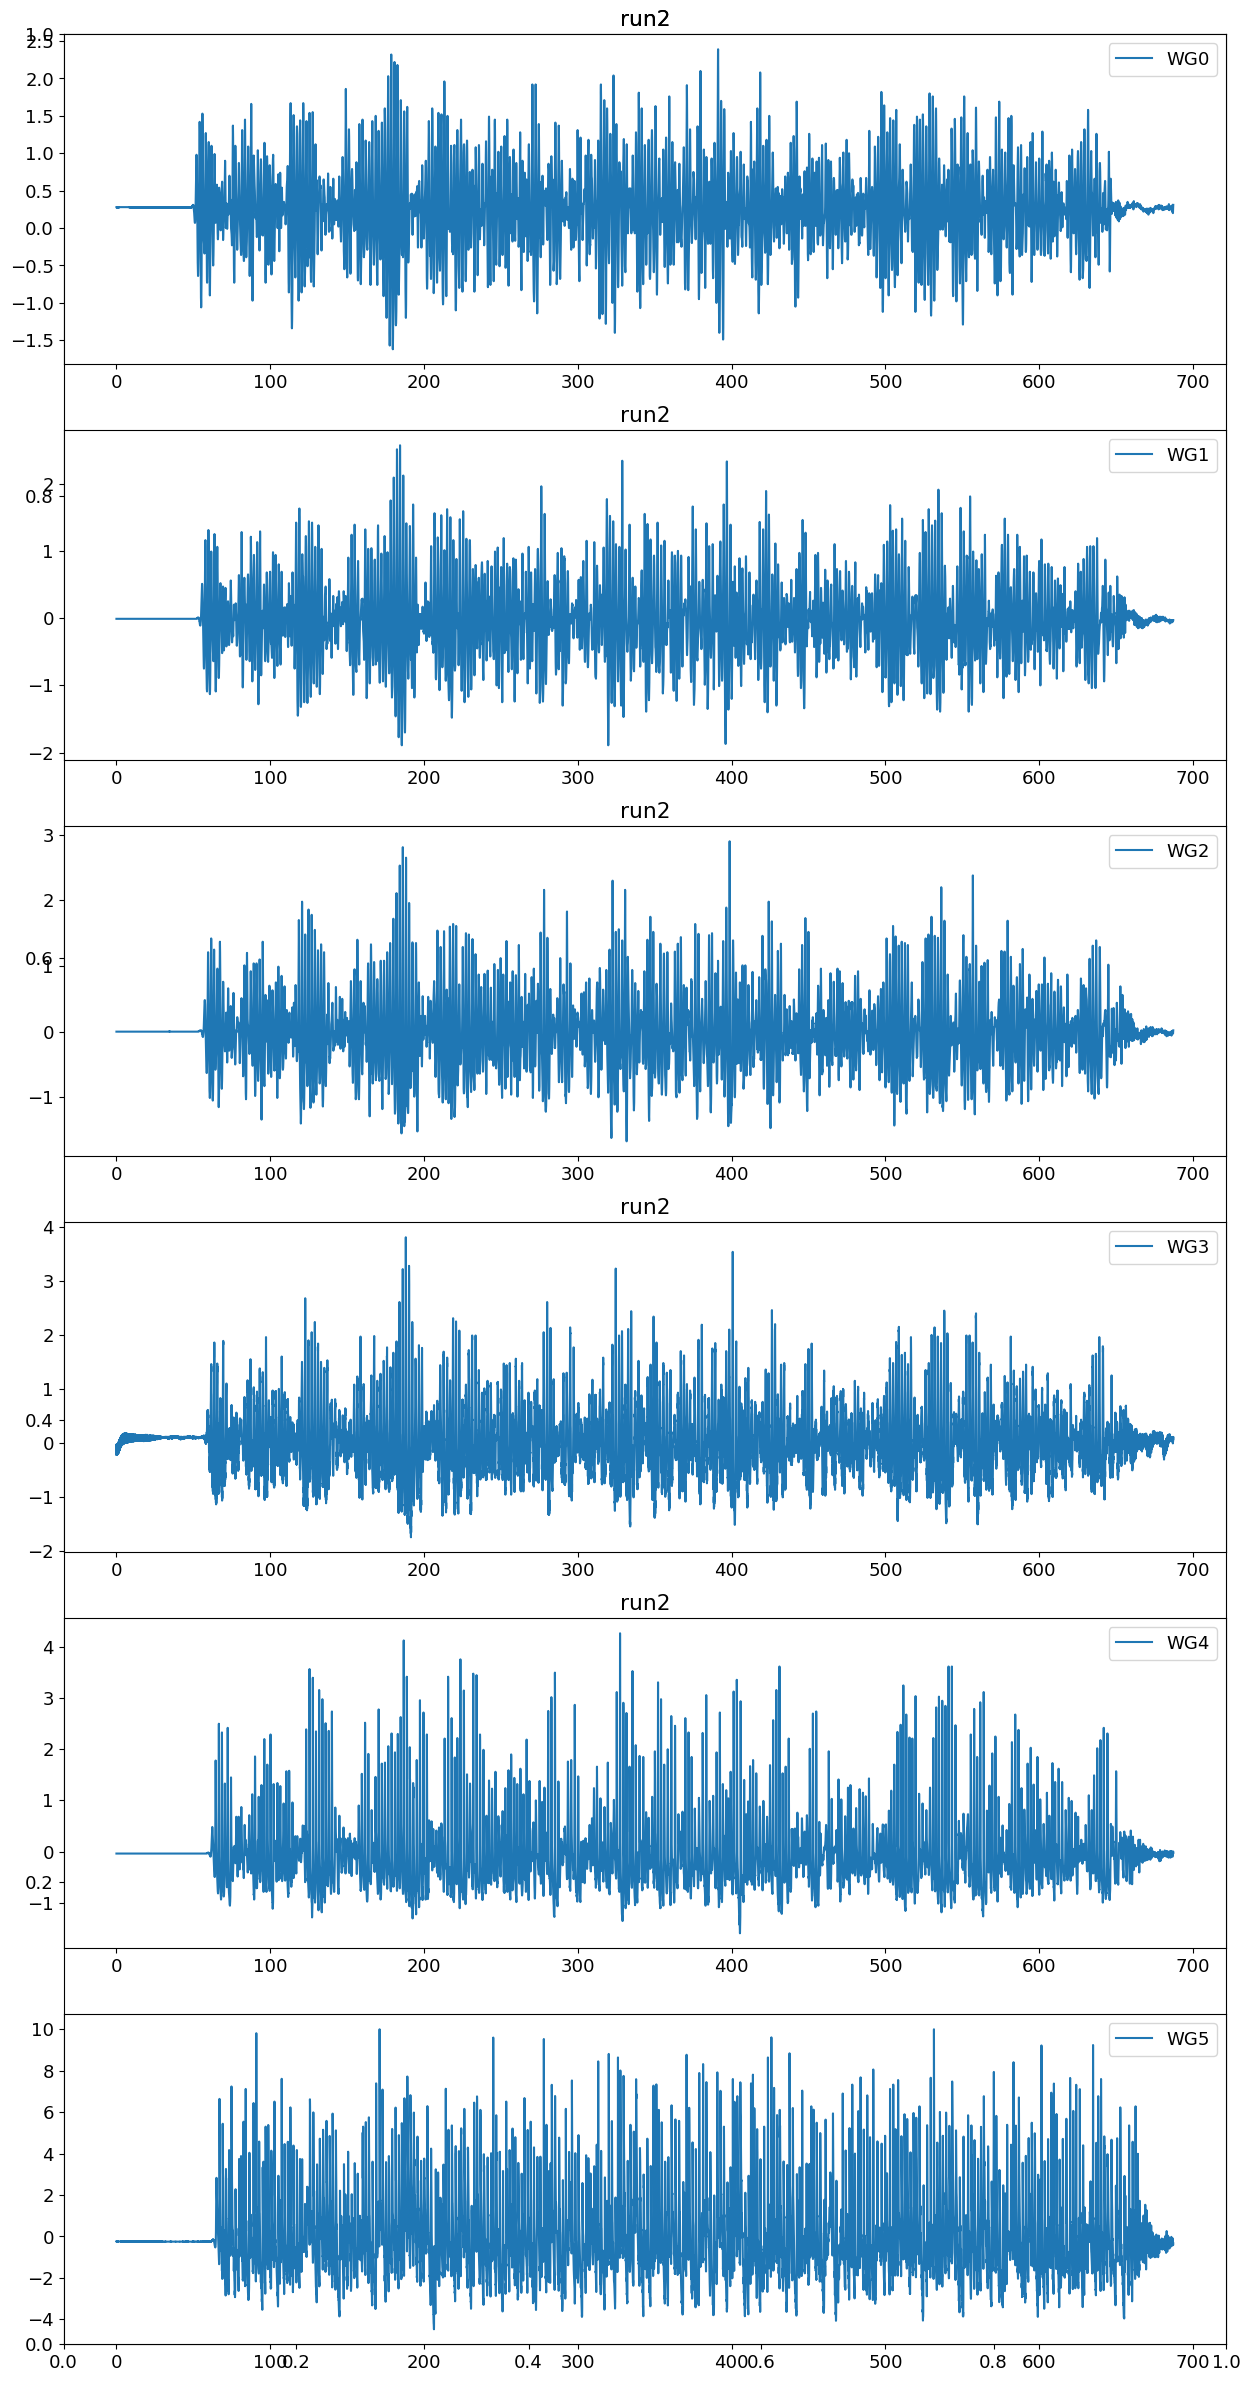

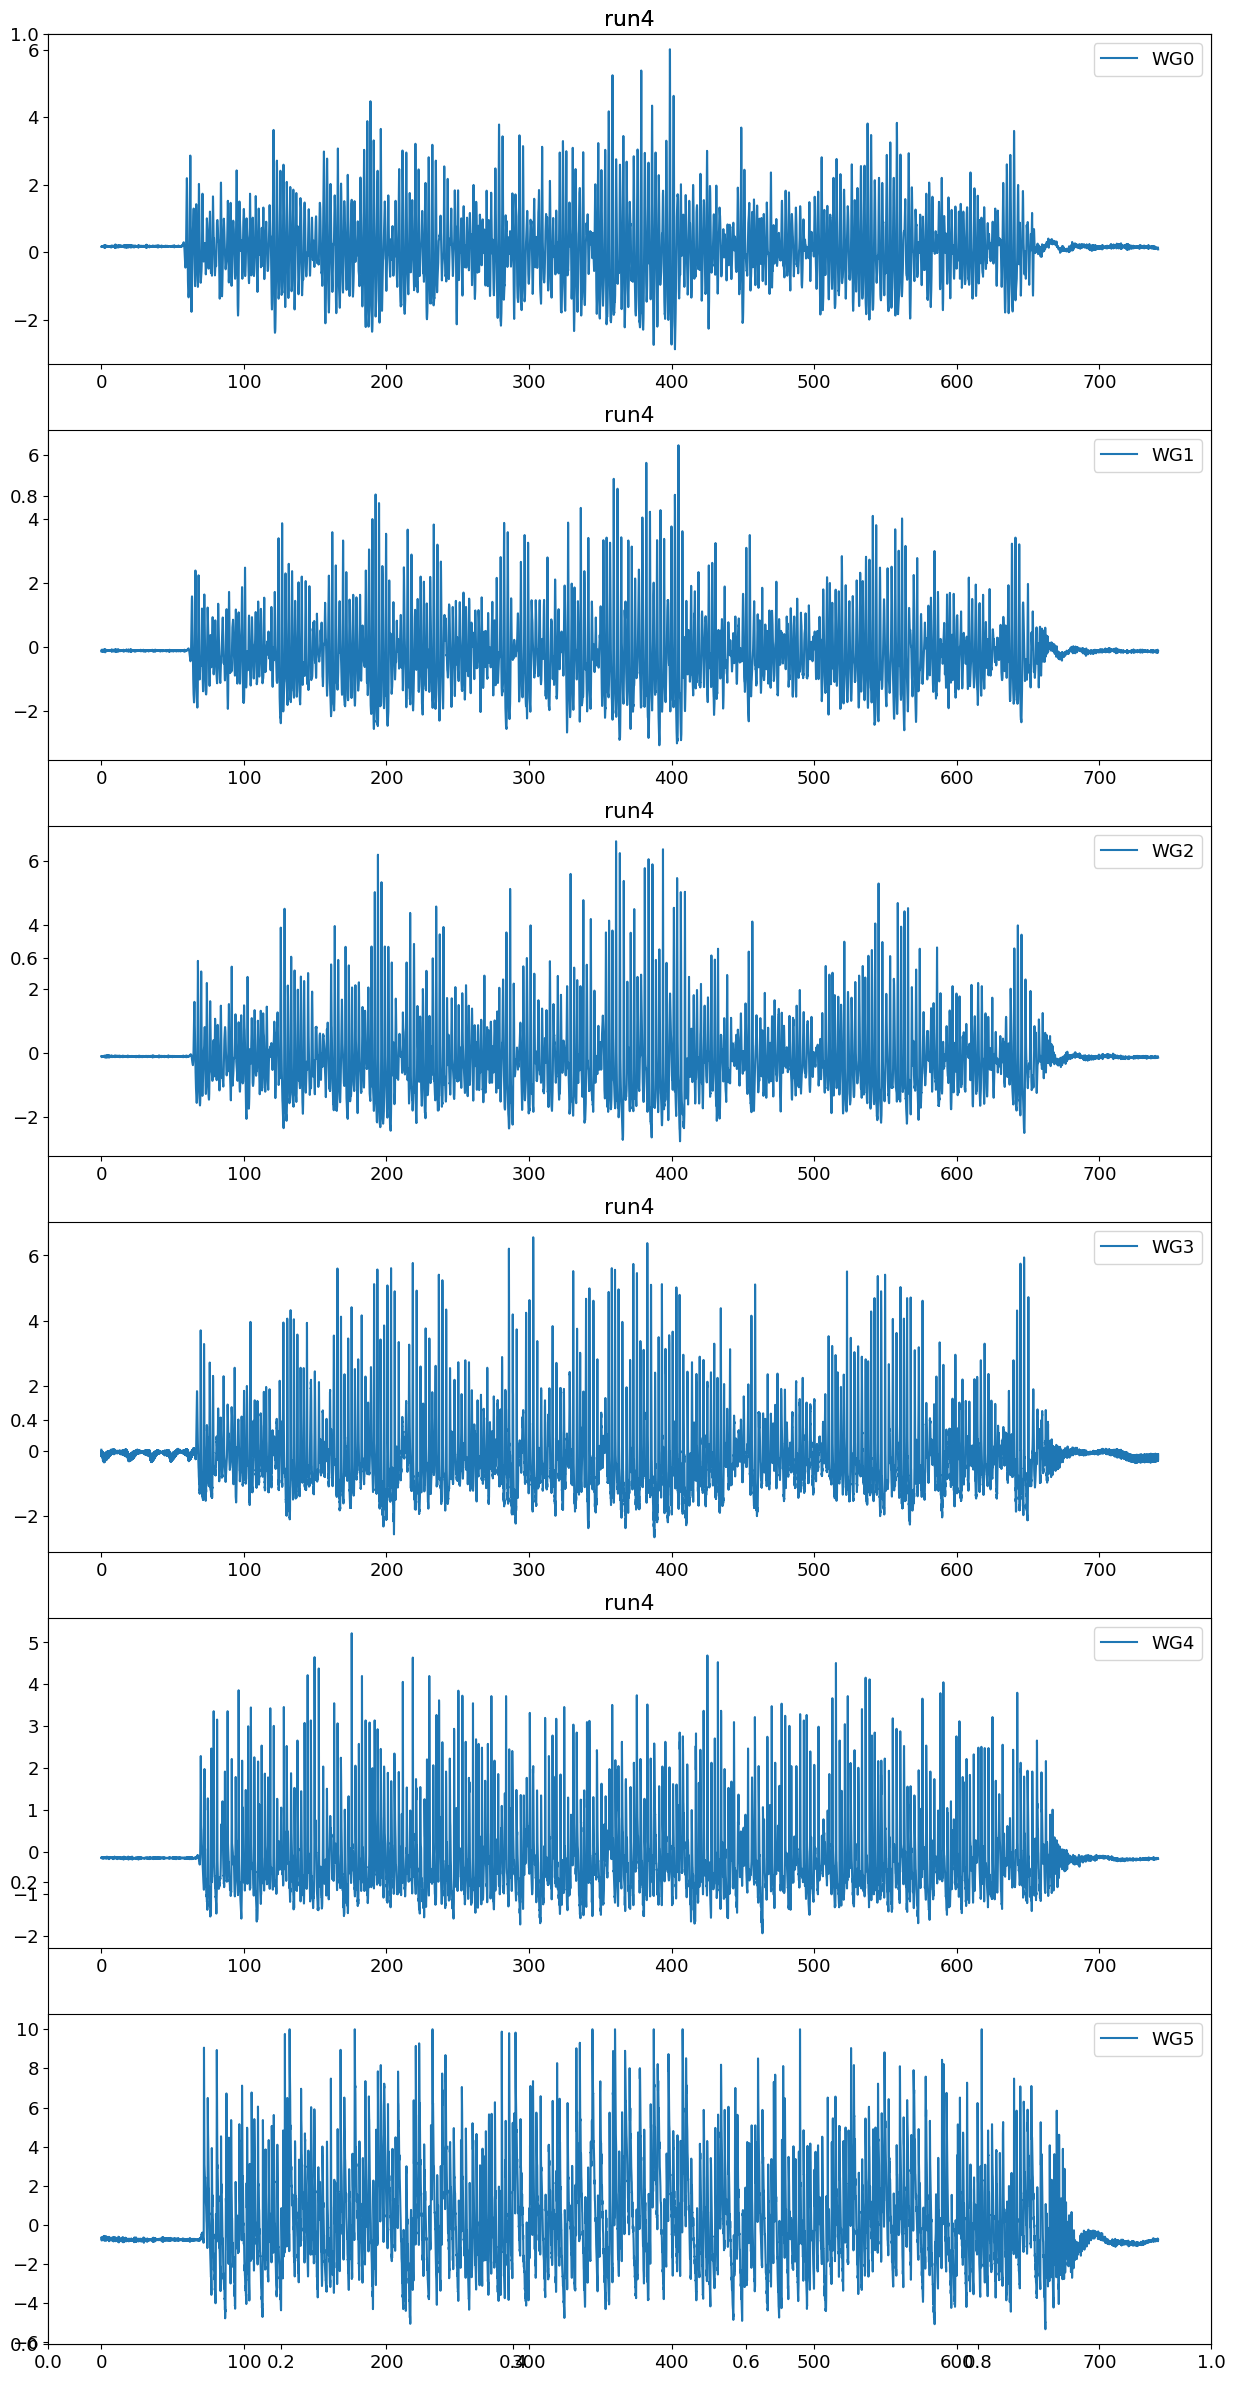

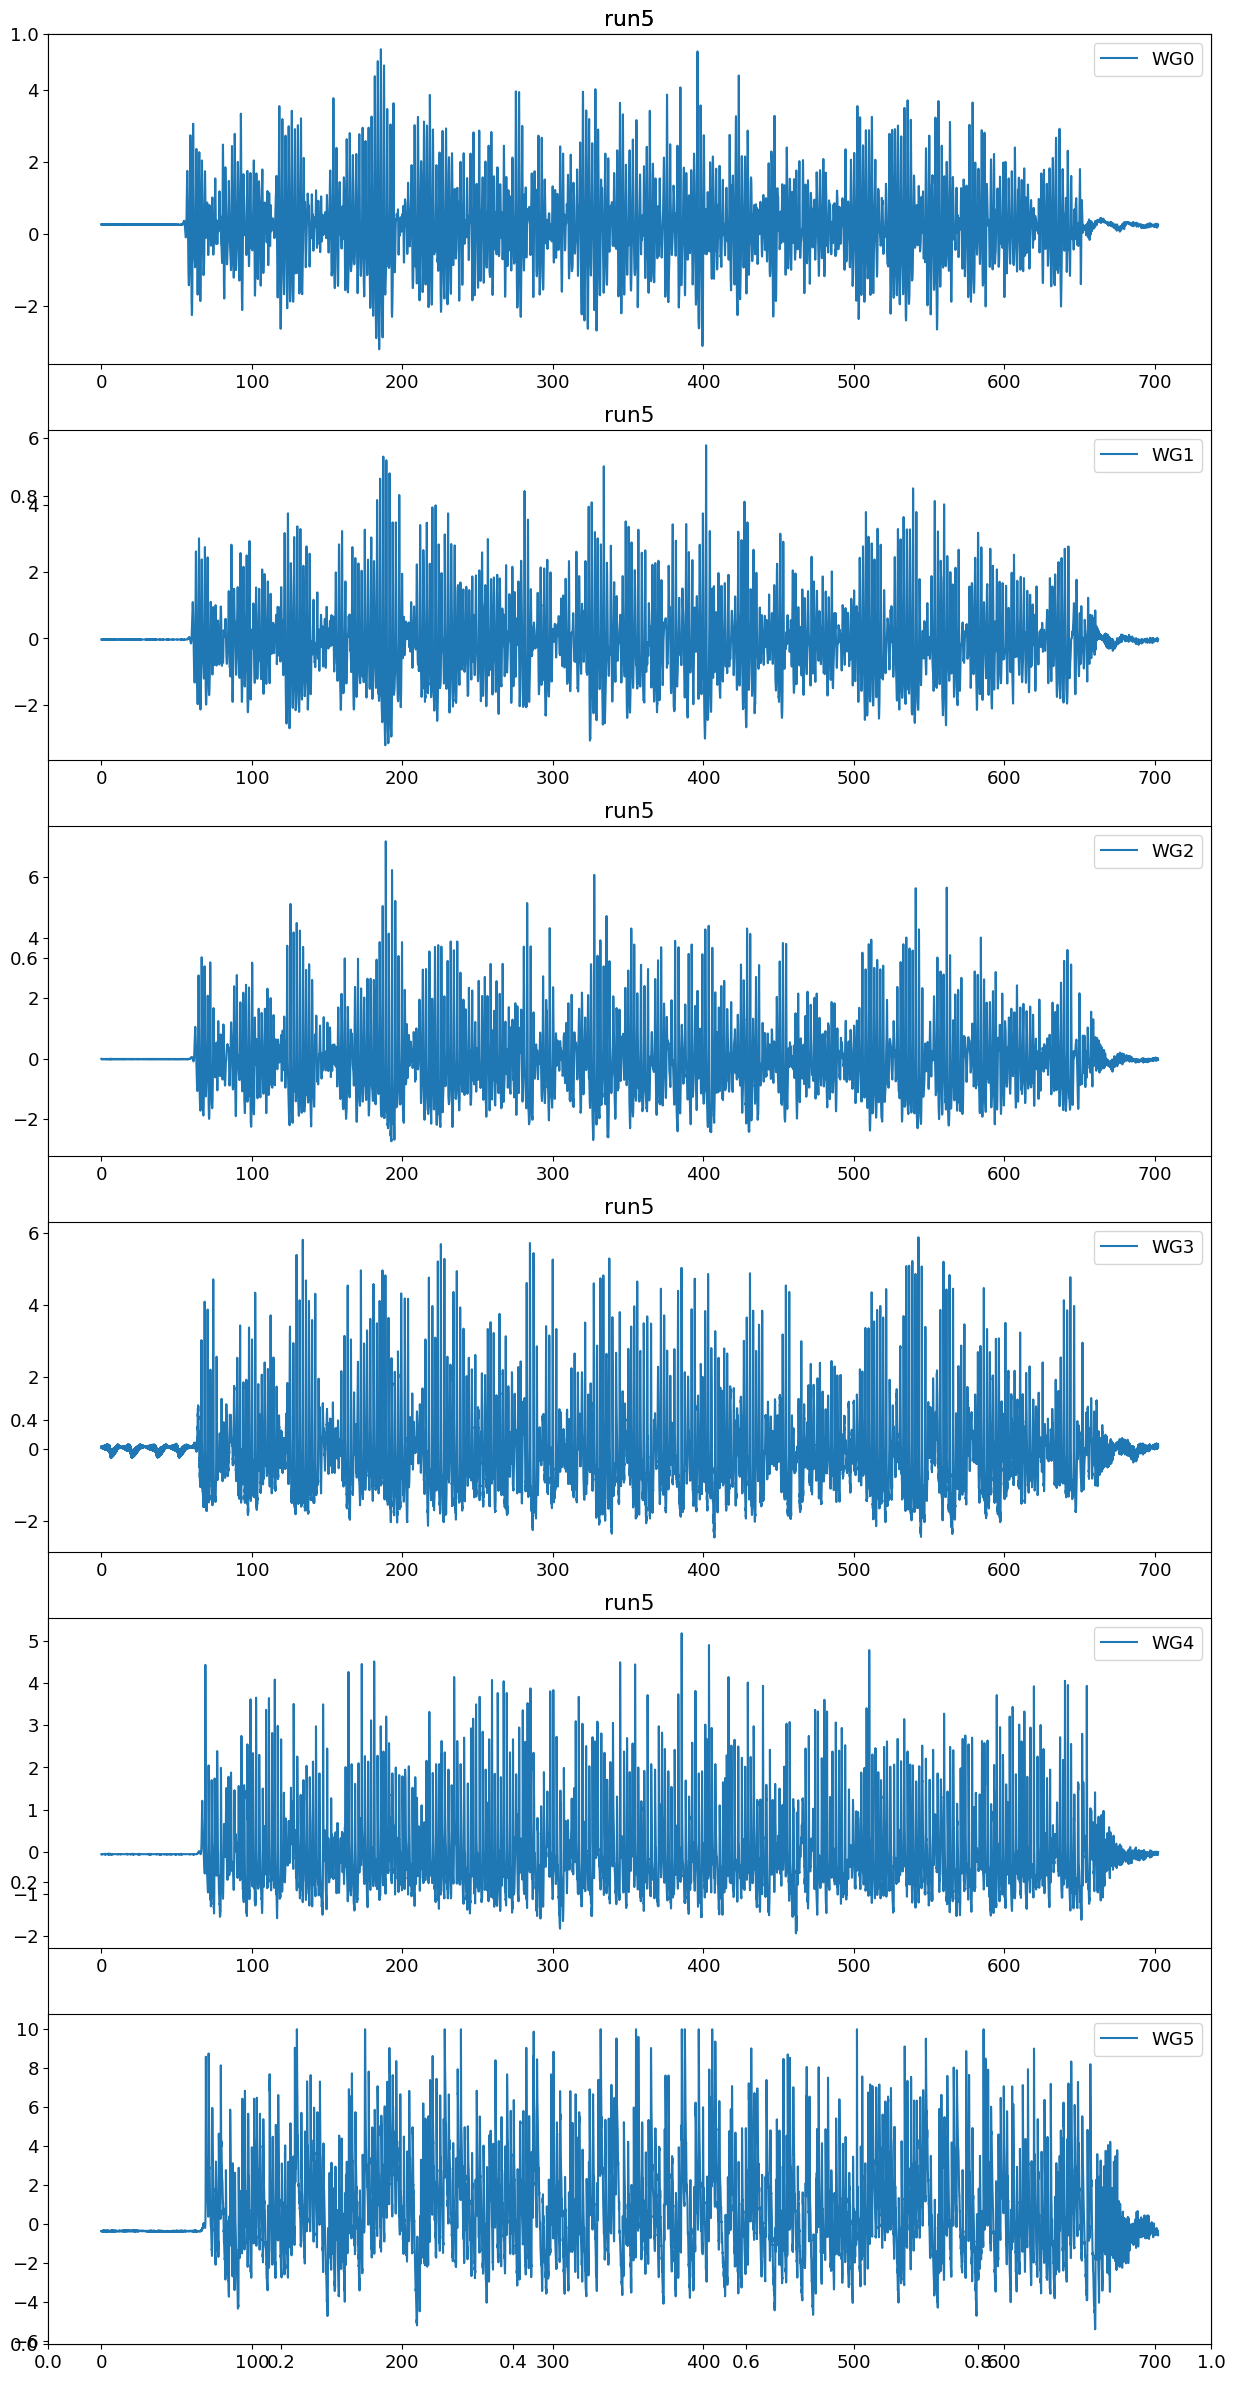

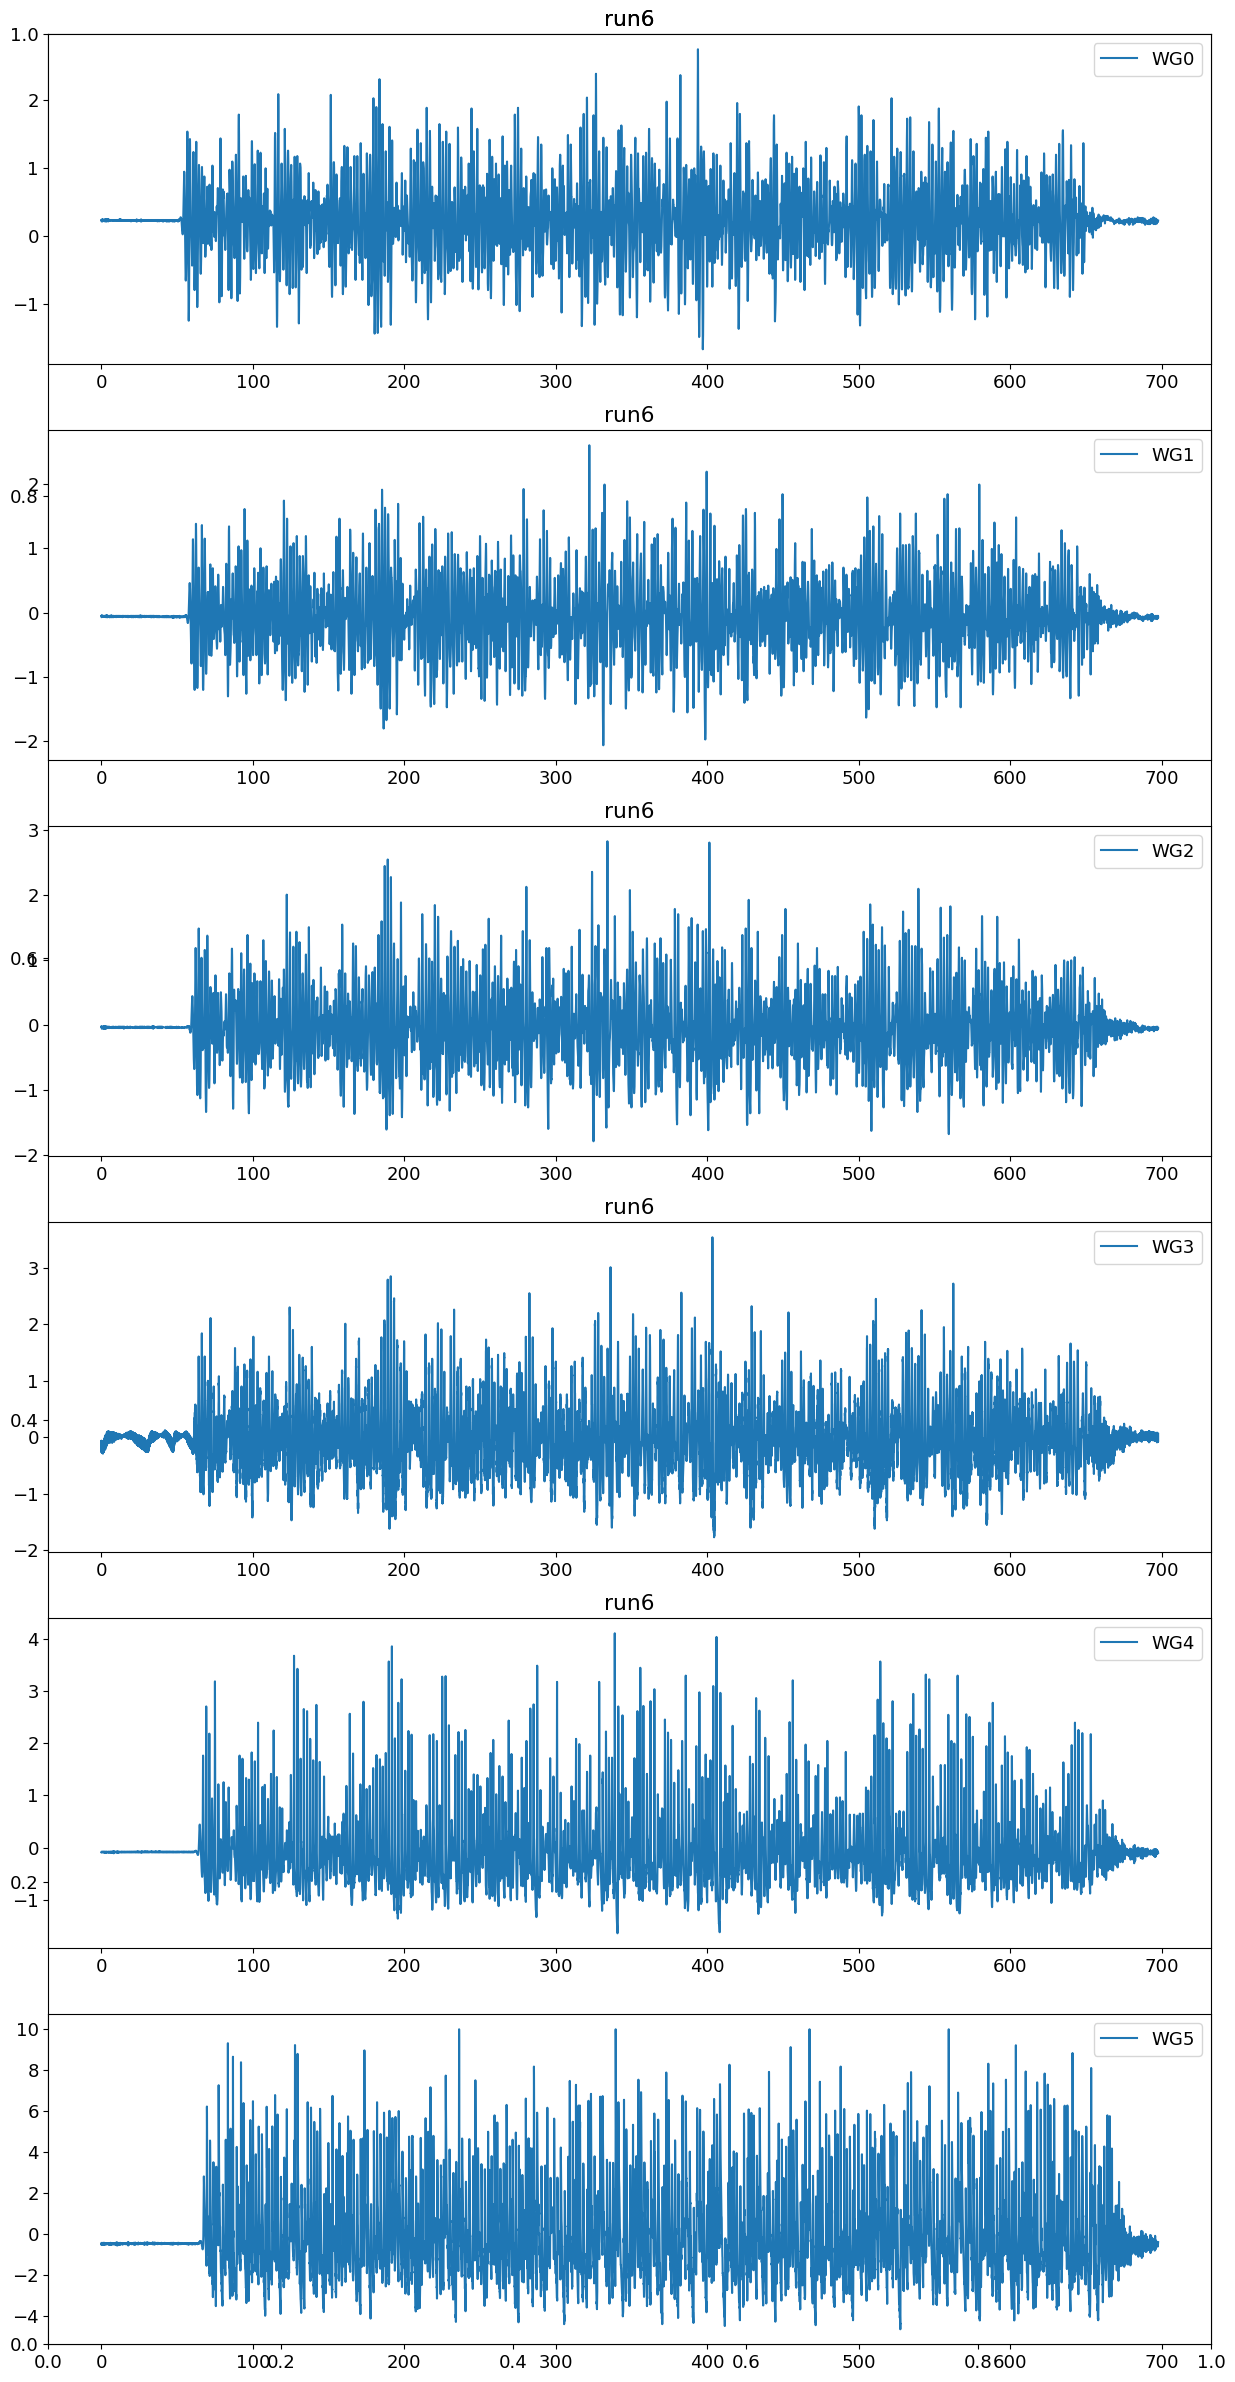

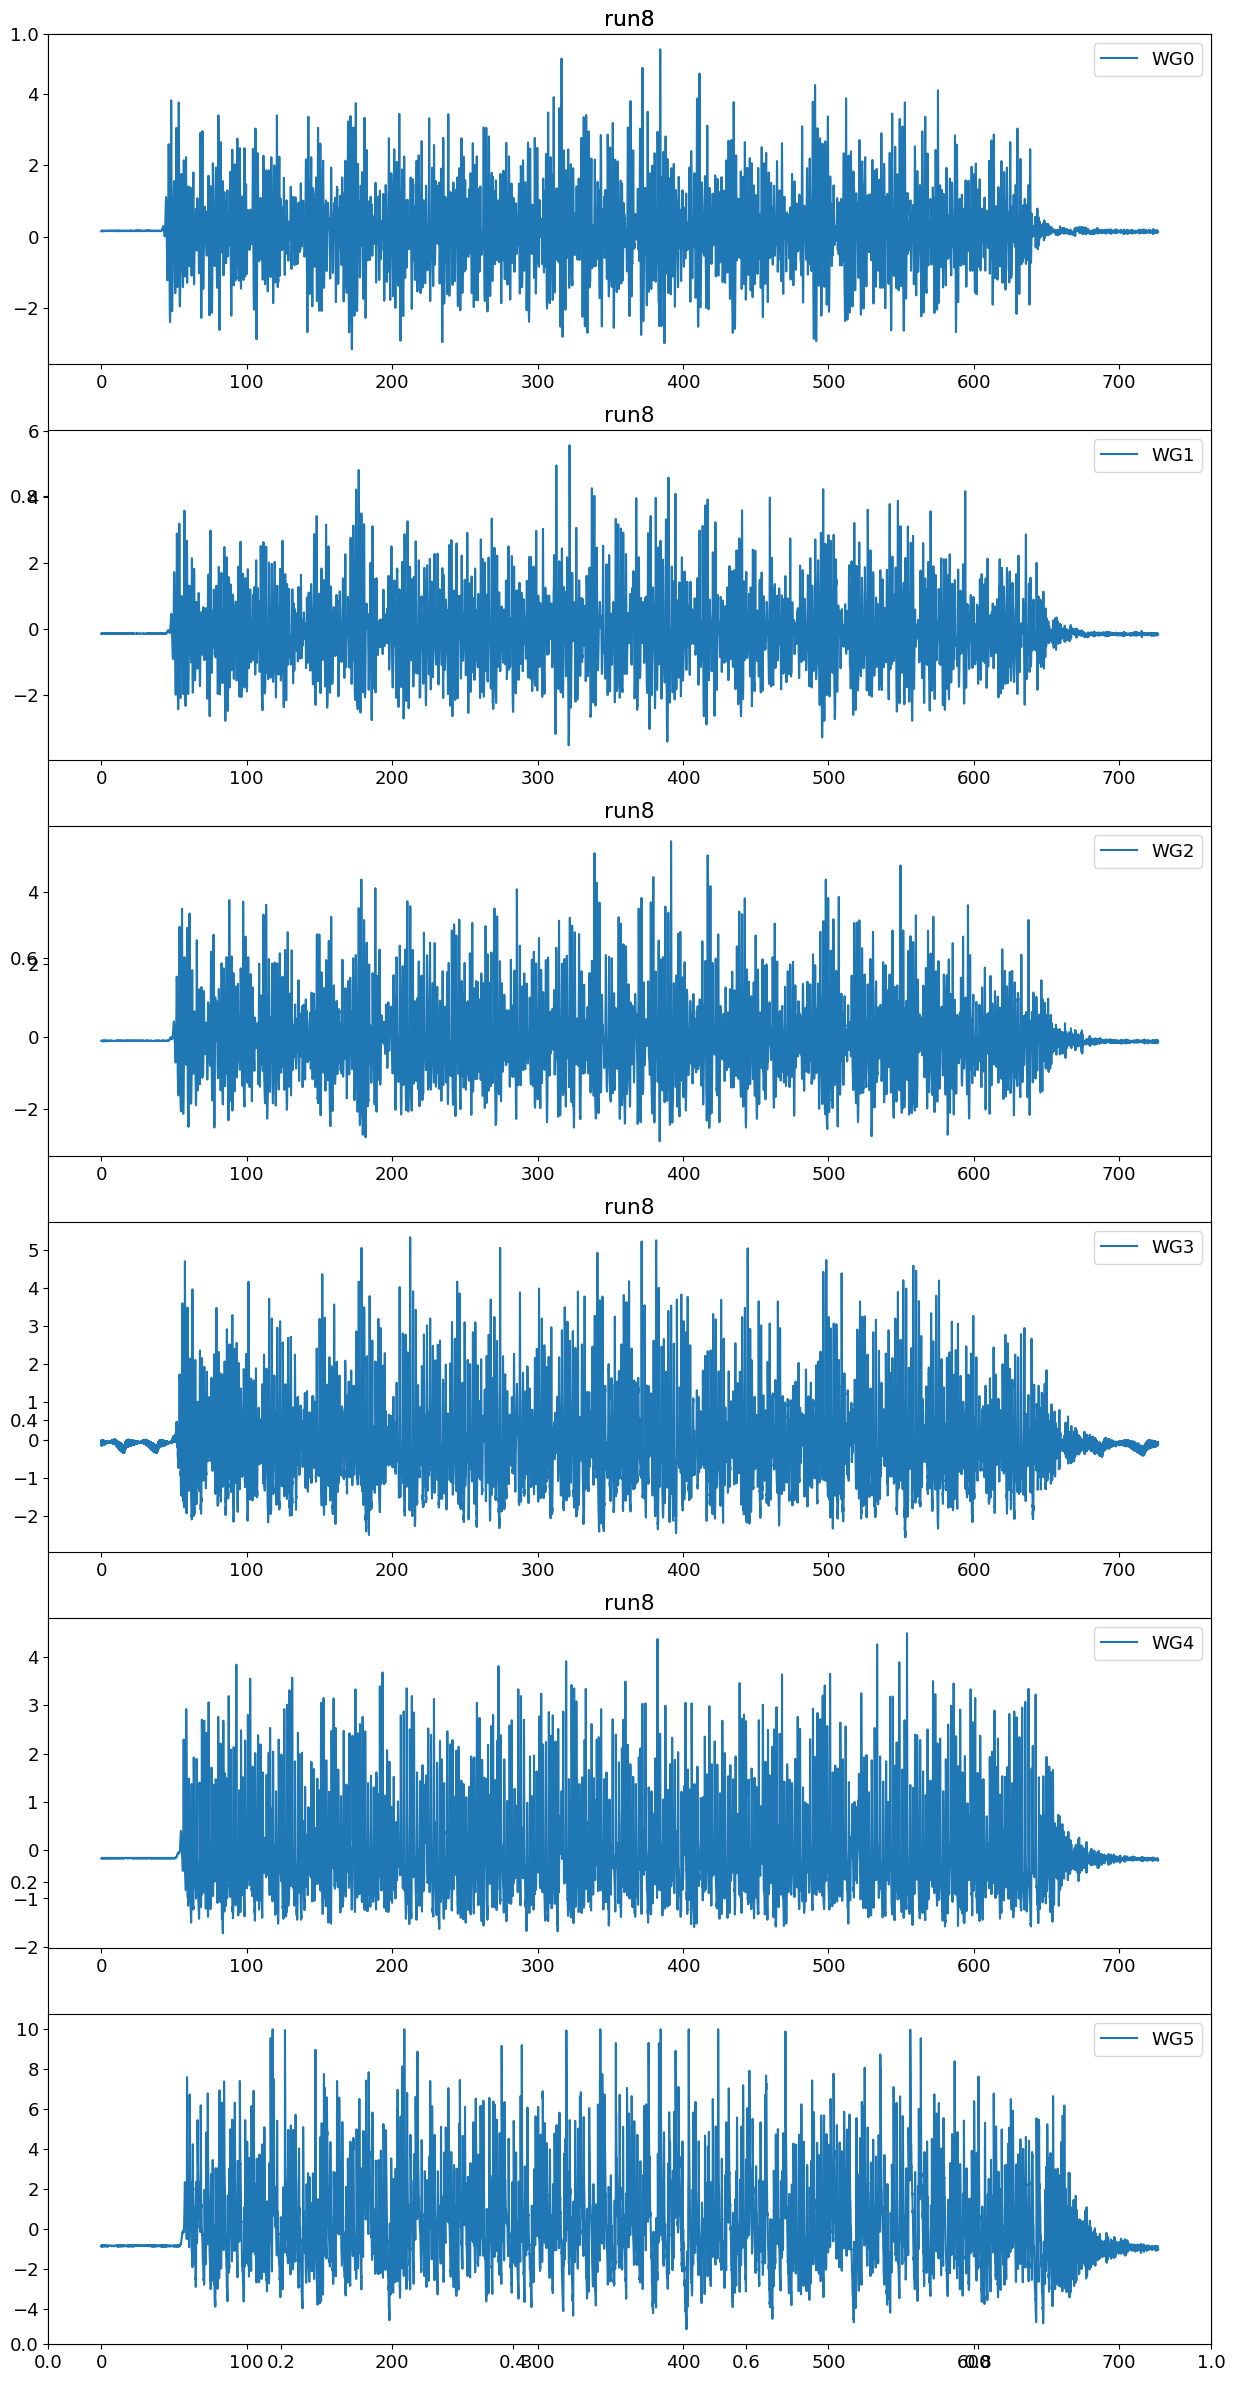

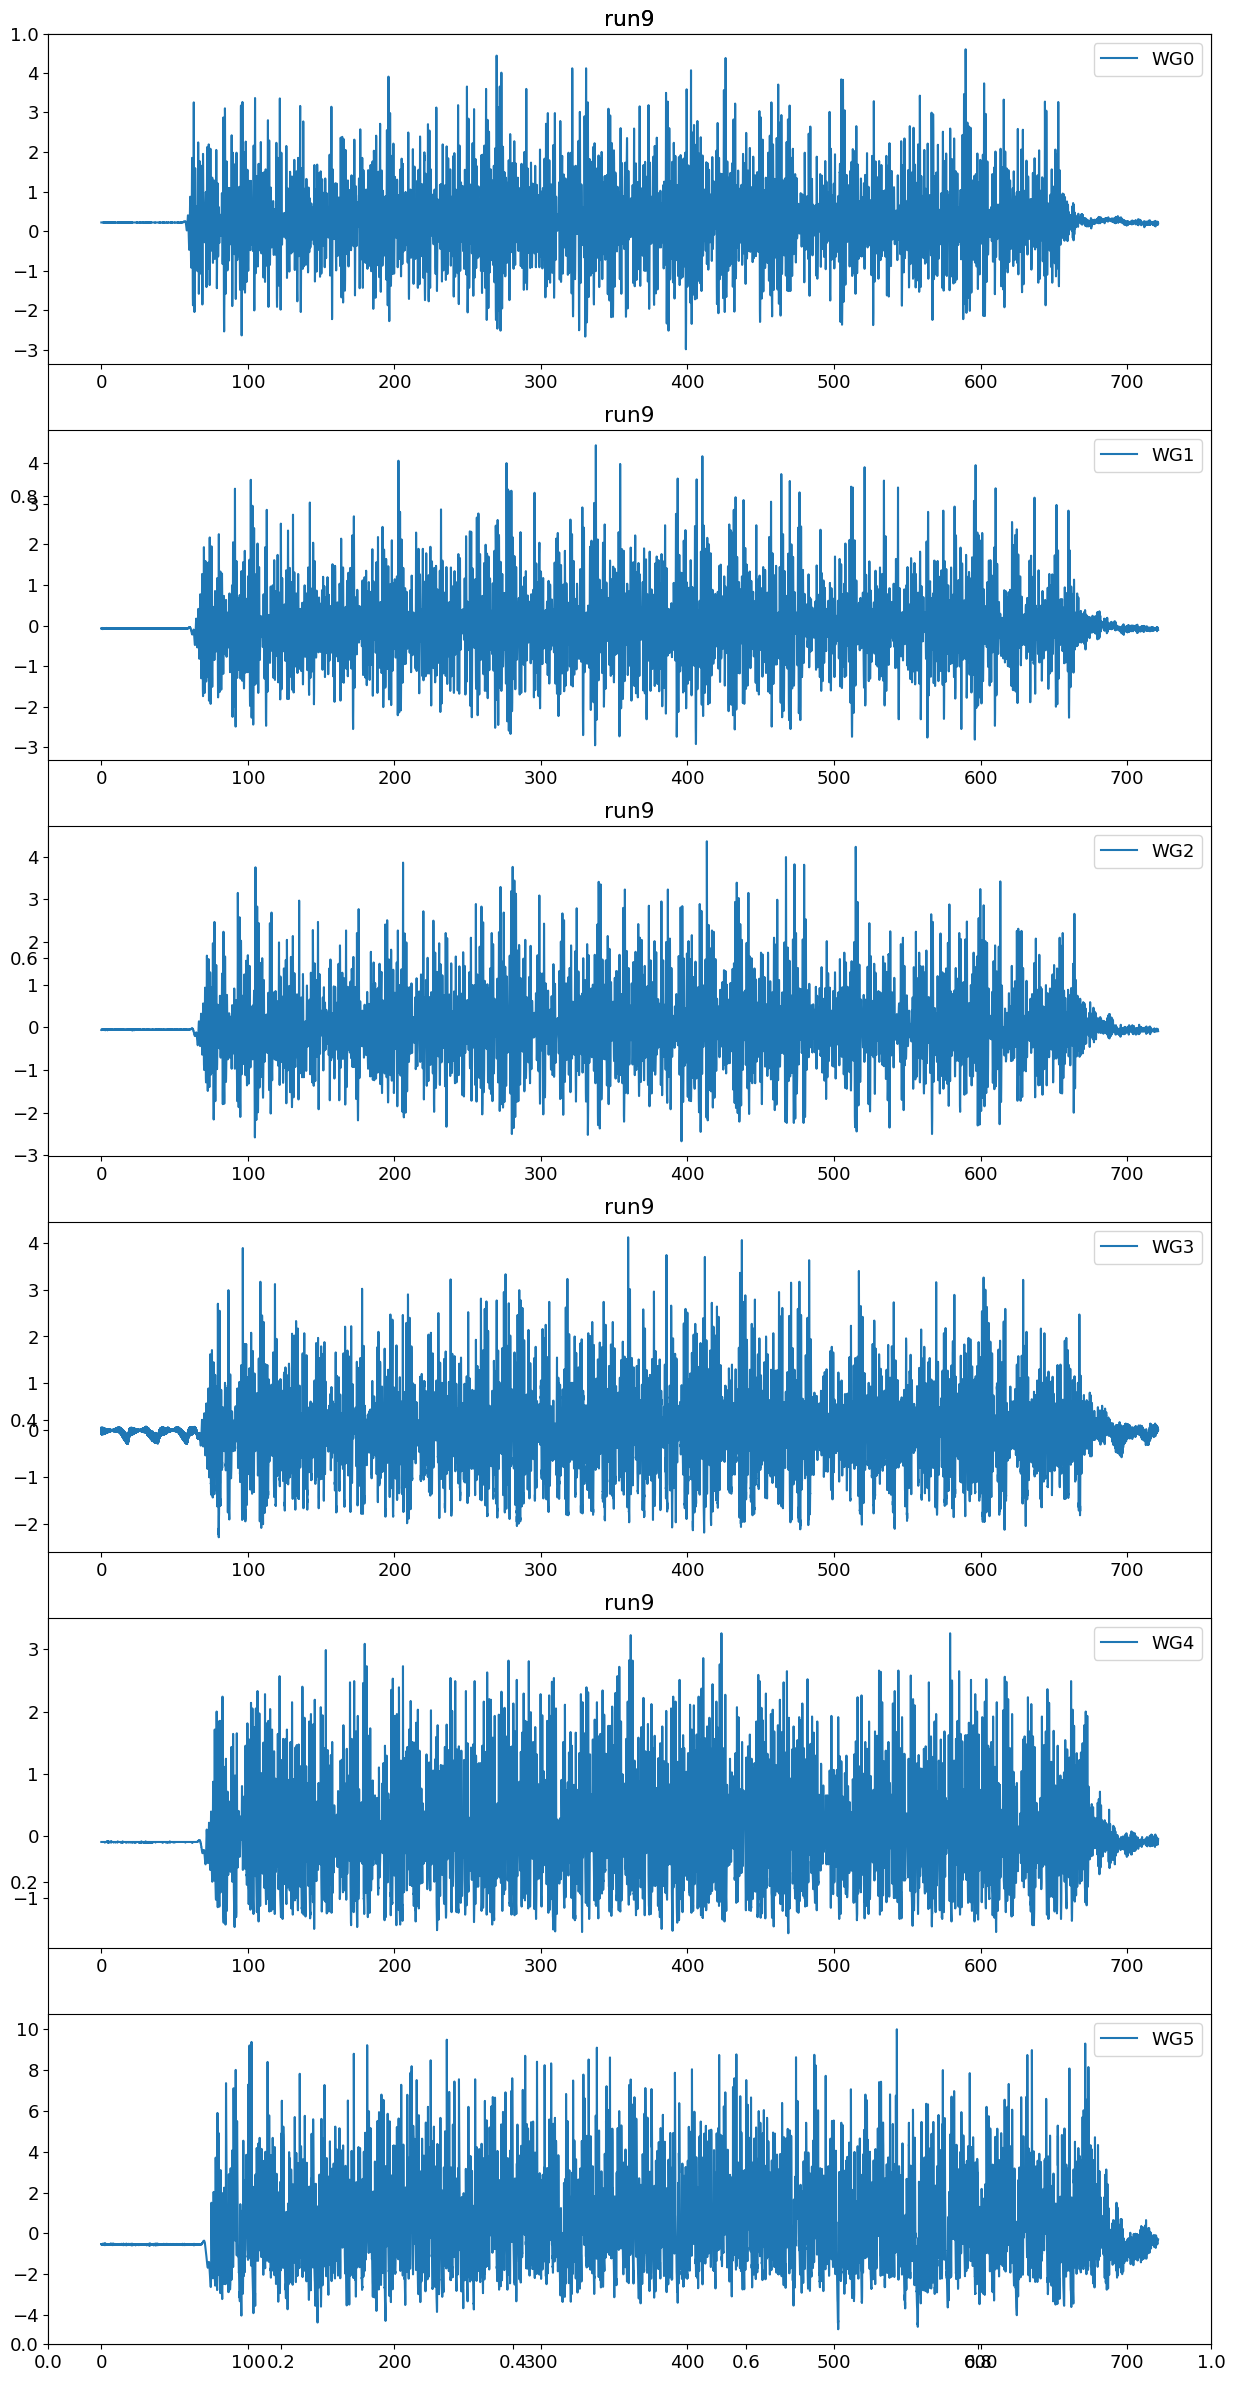

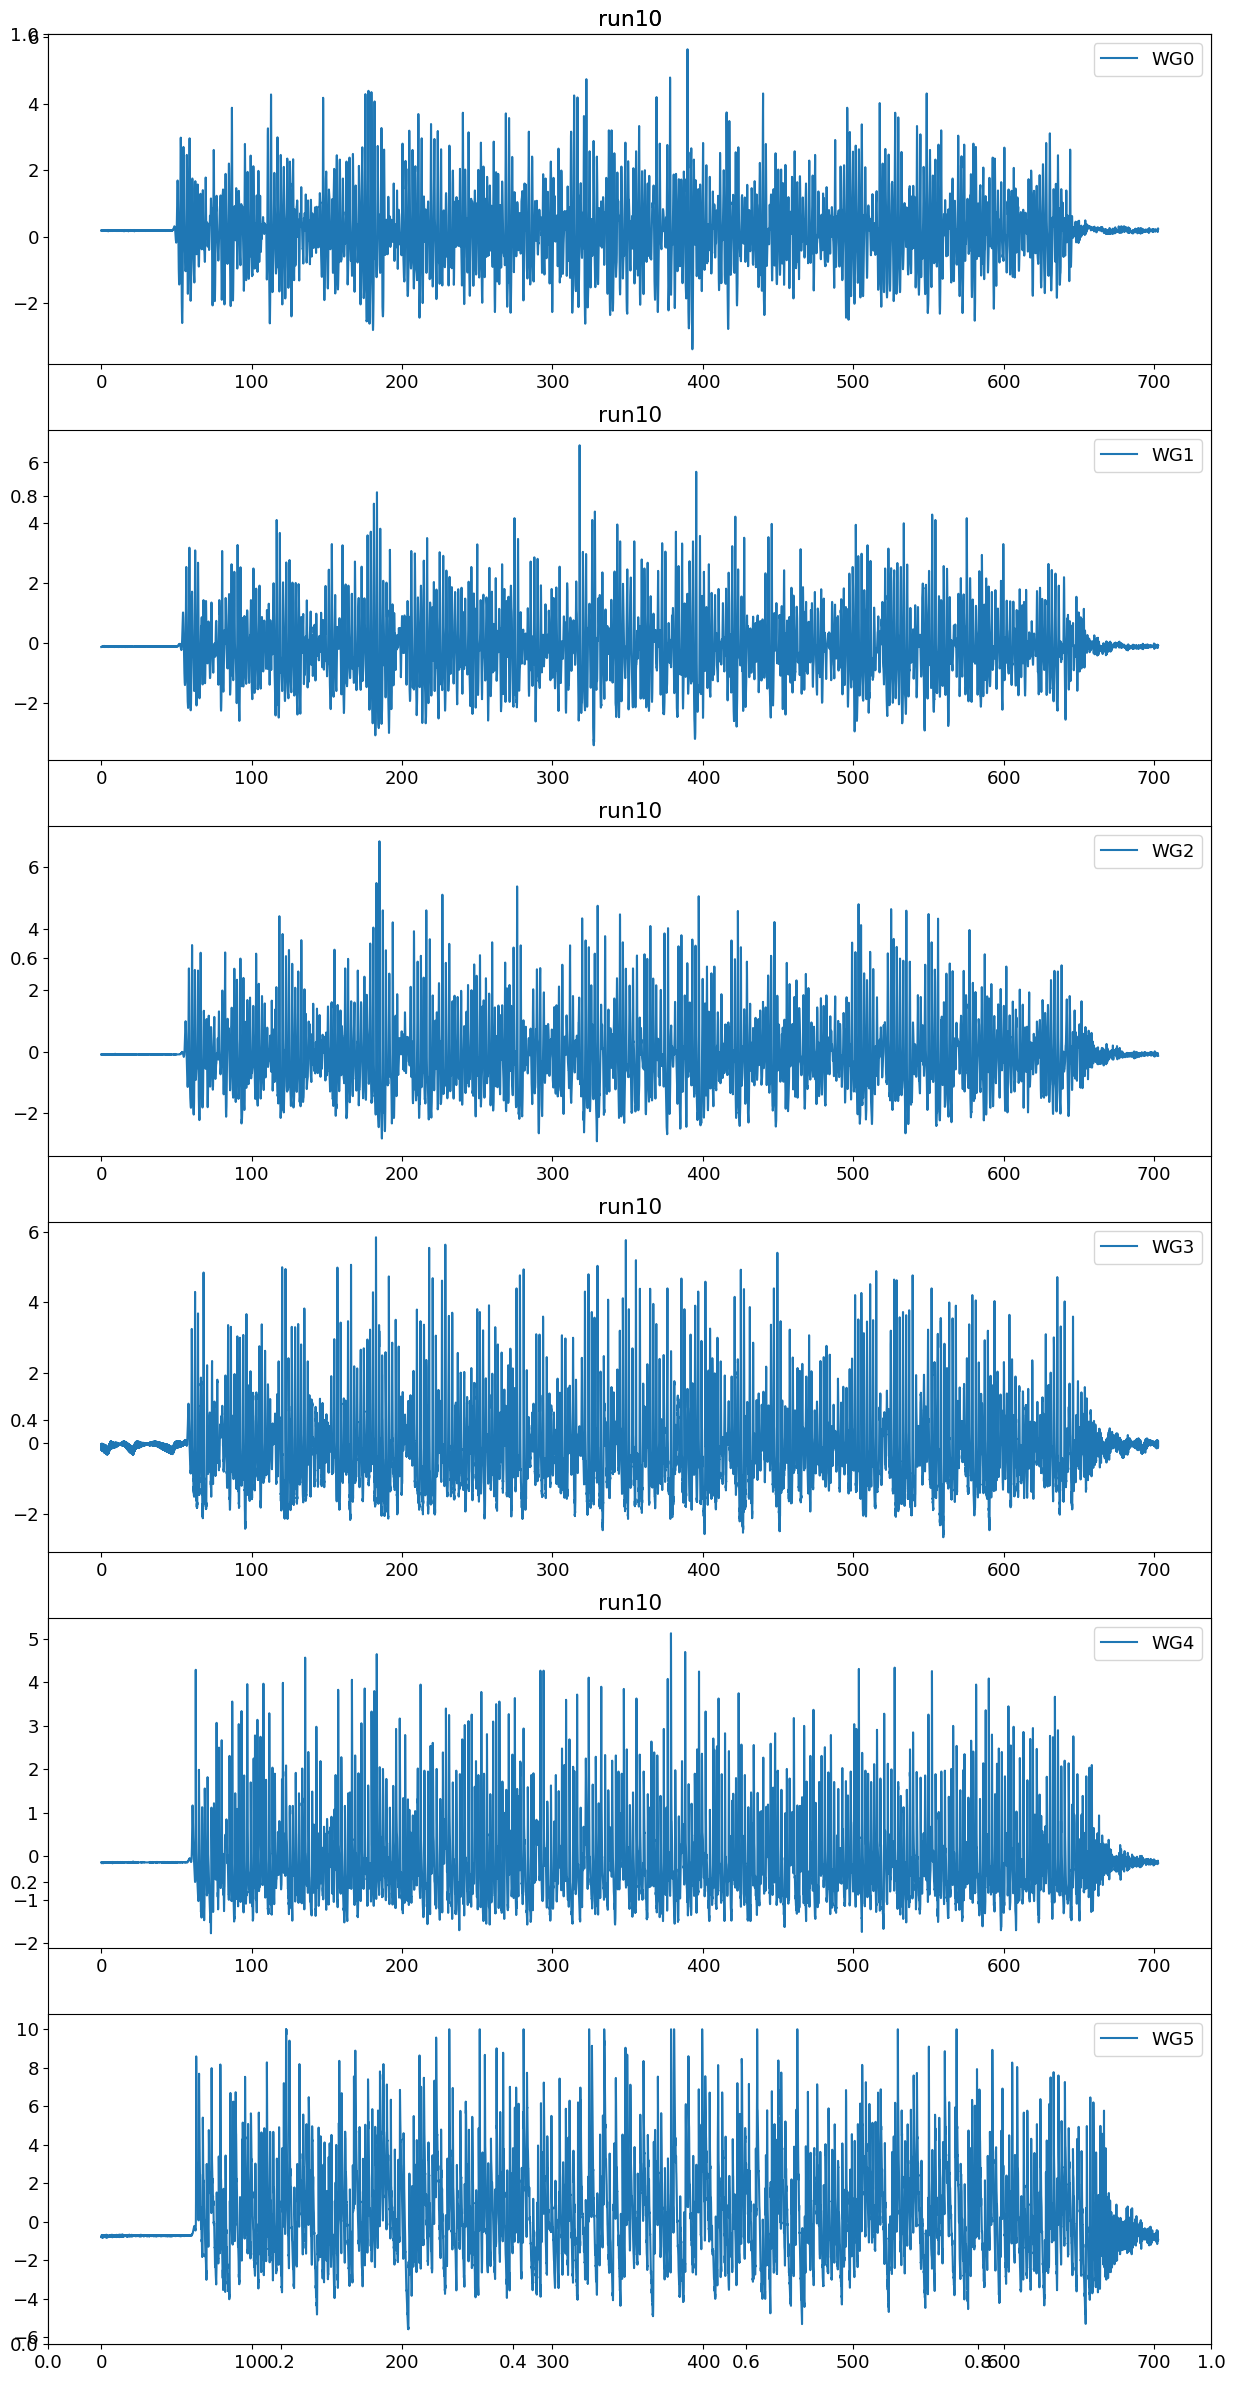

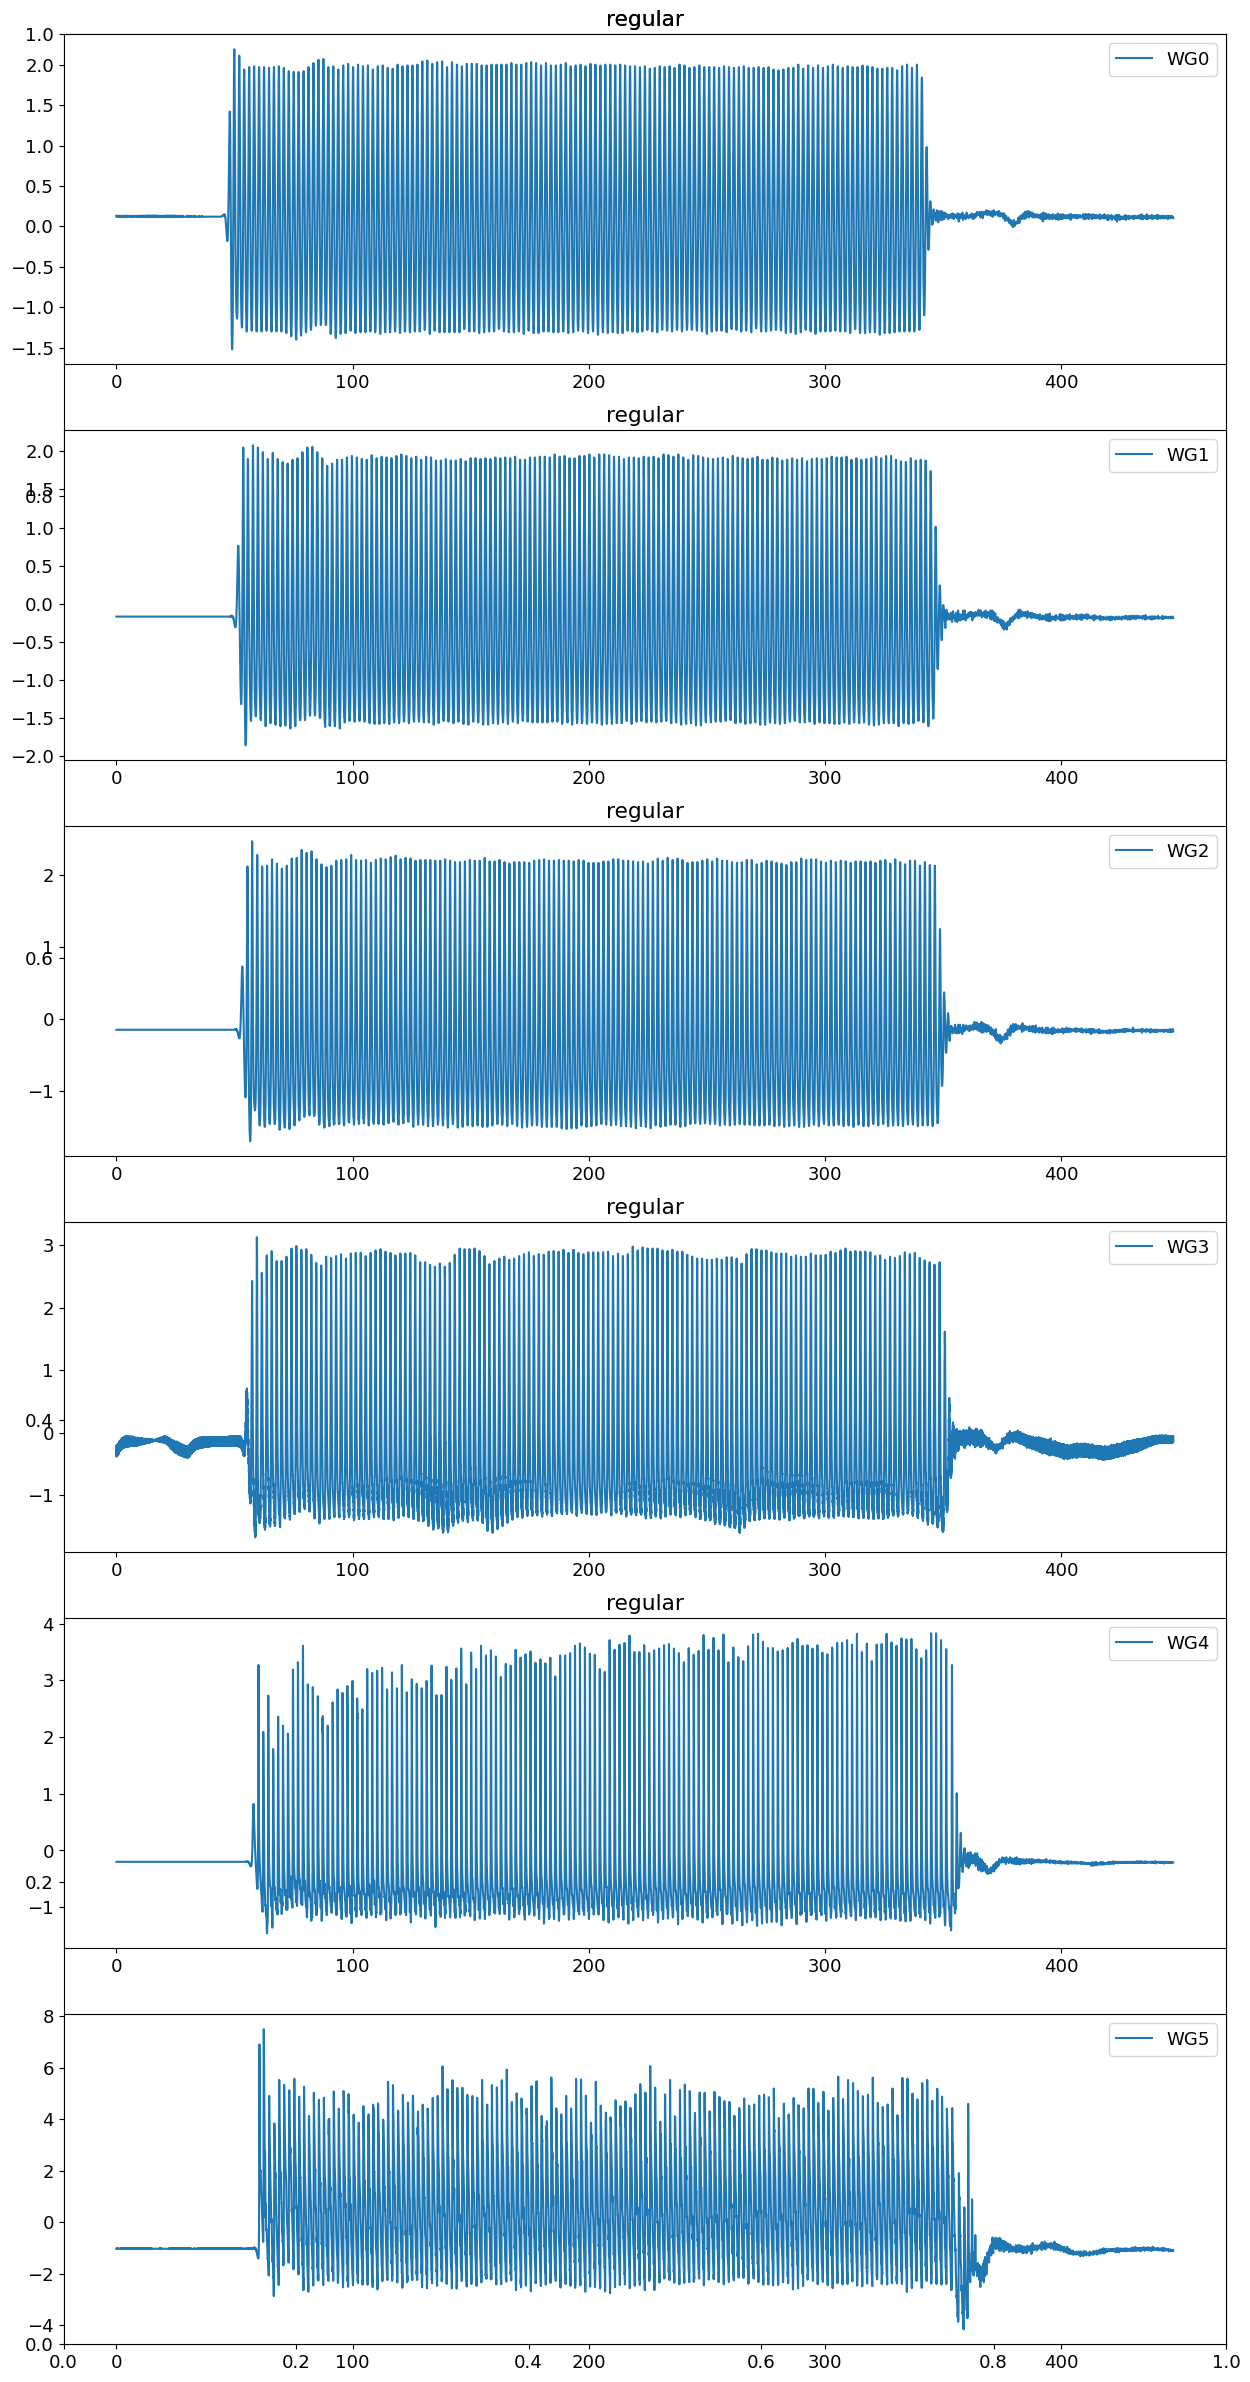

In [ ]:
for d in res.keys():
    plt.figure(figsize=[15,30])
    for i in range(6):
        plt.title(d)
        plt.subplot(6,1,i+1)
        plt.plot(res[d]['time'],res[d]['wl'][:,i],label='WG'+str(i+1))
        plt.legend()
    plt.savefig('Figure')

<h1 style="color:#00BFFF;"> Data postprocessing </h1>
<hr style="height:2px;border:none;color:#333;" />

<h3 style="color:#00BFFF;">Data calibration </h3>
<hr style="height:1.5px;border:none;color:#333;" />

The next step is to convert from volts to flow velocities for EMF and from volts to meters for WG. Every EMF follows the same conversion formula $u=0.1023x$, where $x$ is the data read. Do not worry yet about the initial offset (i.e.,flow velocities not being 0 at the beginning of the run), that will be removed in the next step.

Different parameters are used for converting the wave gauge data to metres. Use the following formula $\eta=coefficient * x$, where $x$ is the data read and the coeffificents are 0.0253,  0.0248 , 0.0249 , 0.0245 , 0.0244 , 0.00502. The order goes from offshore to onshore (the first one is the closest to the wave generator). Again, do not worry yet about the vertical offset. 


<h3 style="color:#00BFFF;">Offset removal and other quality checks </h3>
<hr style="height:1.5px;border:none;color:#333;" />

Remove the vertical offset in the timeseries, i.e. transform the time series so that the elevation and velocities are zeros when the water is at rest. First, visually inspect the data to see for what time interval this is still the case. Then determine the offset, for example via the mean elevation or velocity over this time interval. The offset is removed by subtracting this mean value from the entire dataset. Note that the offset is different for each sensor and might vary per run. 

If you are working with the velocity timeseries, make sure that the instruments have been orientated properly. One quick way to do so is to check that the horizontal velocity and elevation at the start of the run are in phase. Of one sensor plot the first seconds of the WG and EMF, the signals must be one on top of the other with a different scale. Check it for every sensor.

<h3 style="color:#00BFFF;"> Stationarity  </h3>
<hr style="height:1.5px;border:none;color:#333;" />

The wavemaker starts generating waves at the offshore boundary over an initially flat water surface. It will take some time before stationary conditions are reached (e.g., the waves need to propagate over the full domain and back in case of reflection, and setup needs time to build up). Do not forget to remove this "spinup time" before calculating any wave statistics. 
<br>
To determine the spinup time, visually check at what time the sensors start measuring waves and add 60 seconds to ensure stationarity. Remove this data from your time series. Follow a similar process to delete the last part of the run, once the paddle was stopped. 

<hr style="height:1.5px;border:none;color:#333;" />
<h1 style="color:#00BFFF;"> Compare your input data to the measured data </h1>
<hr style="height:1.5px;border:none;color:#333;" />

Use the most offshore sensor to compute the significant wave height and peak period (following the computer laboratory on spectral analysis and associated lectures). How do the values compare? 

<hr style="height:1.5px;border:none;color:#333;" />
<h1 style="color:#00BFFF;"> Compare measurements to linear wave theory </h1>
<hr style="height:1.5px;border:none;color:#333;" />

Do flow velocity measurements match the amplitude flow velocities predicted by linear wave theory? This is a final quality control check. 
<br>
Use the significant wave height and significant wave period extracted from sensor 1, to compute the velocity amplitude ($û_x$, see lecture 2, Q2). You will require your measured EMF depth.

Plot part of your measured flow velocity. Are these values in the same order of magnitude as those predicted by linear wave theory? 
<br>
Don't expect an exact match as the measure flow velocity corresponds to an irregular wave field while the formula for the flow velocities correspond to regular waves.

<hr style="height:1.5px;border:none;color:#333;" />
Notebook made and updated by
<br>
- Joep Huijbregts
<br>
- Jaime Arriaga Garcia
<br>
- Marion Tissier 
<br>
- Ad Reniers

